In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal

## Loading the training dataset (2Gb)

In [2]:
#!wget https://lisa-ldc.lal.in2p3.fr/media/uploads/LDC2_sangria_training_v2.h5

Training file contains the following dataset:
- `sky/src/cat` with `src` in ['vgb', 'dbg', 'igb', 'mbhb'] with source parameters
- `sky/src/tdi` with `src` in ['vgb', 'dbg', 'igb', 'mbhb'] with noise free TDI X, Y, Z
- `obs/tdi` with noisy TDI as is a 4D array which contains time vector, X, Y, Z

Additional parameter of the simulation can be found in `instru/config` and `obs/config` and `sky/src/config`. 

### Parse hdf5 file

In [3]:
training_file = 'LDC2_sangria_training_v2.h5'
def print_attrs(name, obj):
    shift = name.count('/') * '    '
    print(shift + name)
    for key, val in obj.attrs.items():
        print(shift + '    ' + f"{key}: {val}")

fid = h5py.File(training_file)
fid.visititems(print_attrs)

header
    header/date
instru
    instru/config
        instru/config/LISA_AAFILTER_ATTENUATION
        instru/config/LISA_AAFILTER_TRANSITION_BAND_0
        instru/config/LISA_AAFILTER_TRANSITION_BAND_1
        instru/config/LISA_ACC_NOISE_A_LEVEL
        instru/config/LISA_ACC_NOISE_F_KNEE
        instru/config/LISA_ACC_NOISE_USE_PZM
        instru/config/LISA_ADC_RECURSION_ORDER
        instru/config/LISA_BACKLINK_NOISE_A_LEVEL
        instru/config/LISA_BACKLINK_NOISE_F_KNEE
        instru/config/LISA_DEBUG_CLOCK_OFFSETS
        instru/config/LISA_FREQUENCY_OFFSETS_12
        instru/config/LISA_FREQUENCY_OFFSETS_13
        instru/config/LISA_FREQUENCY_OFFSETS_21
        instru/config/LISA_FREQUENCY_OFFSETS_23
        instru/config/LISA_FREQUENCY_OFFSETS_31
        instru/config/LISA_FREQUENCY_OFFSETS_32
        instru/config/LISA_GLITCH_FILE
        instru/config/LISA_GW_FILE_FS
        instru/config/LISA_GW_FILE_UPSAMPLING
        instru/config/LISA_GW_TYPE
        instru/config/L

### Get source parameters

In [4]:
fid = h5py.File(training_file)
names = fid["sky/mbhb/cat"].dtype.names
cat_mbhb = np.rec.fromarrays([np.array(fid["sky/mbhb/cat"][name]).squeeze() for name in names], names=names)
pd.DataFrame(cat_mbhb)

,EclipticLatitude,EclipticLongitude,PolarAngleOfSpin1,PolarAngleOfSpin2,Spin1,Spin2,Mass1,Mass2,CoalescenceTime,PhaseAtCoalescence,InitialPolarAngleL,InitialAzimuthalAngleL,Redshift,Distance,ObservationDuration,Cadence
0,-0.564102,0.610927,0.908972,1.181699,0.972661,0.972862,1.015522e+06,7.968491e+05,4.800021e+06,4.275929,2.577539,4.094550,2.18186,17758.367941,3.155815e+07,3.0
1,-1.081082,4.052963,2.354232,1.689765,0.742128,0.989247,4.956676e+06,4.067167e+06,8.746488e+06,3.783309,0.963586,3.636925,6.17688,61097.116076,3.155815e+07,3.0
2,0.636028,0.779159,2.332027,2.065443,0.574122,0.592671,1.773563e+06,1.083356e+06,1.116784e+07,2.311127,0.232802,3.798411,6.03496,59472.237592,3.155815e+07,3.0
3,-0.878570,4.549720,2.068669,1.097989,0.942824,0.870789,9.159926e+05,7.017527e+05,1.125857e+07,1.150360,1.899782,5.829771,1.10396,7705.852640,3.155815e+07,3.0
4,-0.303004,1.292518,1.203136,2.097304,0.747377,0.838800,1.323277e+06,6.124855e+05,1.152694e+07,1.220197,2.691982,1.808398,1.73941,13470.983559,3.155815e+07,3.0
5,0.147296,5.986230,2.434152,1.926613,0.745574,0.546848,2.830218e+06,2.322253e+06,1.197096e+07,4.111379,1.131250,4.319761,5.50770,53474.693790,3.155815e+07,3.0
6,-0.987304,3.886726,2.594339,1.719446,0.829141,0.972219,3.204750e+06,3.056613e+06,1.361711e+07,3.628682,2.050928,1.084370,2.87966,24829.137775,3.155815e+07,3.0
7,0.917031,3.584892,1.665850,2.092903,0.988778,0.975945,1.856420e+06,1.801541e+06,1.653219e+07,1.866057,1.410068,0.527915,4.57261,43010.925050,3.155815e+07,3.0
8,0.835250,3.257316,2.362671,1.539846,0.833674,0.981901,3.983915e+06,2.049535e+06,1.724516e+07,1.578620,2.323179,3.643228,3.34910,29747.551597,3.155815e+07,3.0
9,-0.521369,3.085541,2.582941,2.200156,0.825883,0.811360,3.128823e+06,2.640346e+06,1.860576e+07,3.425317,2.604701,1.670016,7.21026,73048.167218,3.155815e+07,3.0


In [5]:
# get units
units = [(k, fid['sky/mbhb/cat'].attrs.get(k)) for k in names]
units = dict(units)
units

{'EclipticLatitude': 'rad',
 'EclipticLongitude': 'rad',
 'PolarAngleOfSpin1': 'rad',
 'PolarAngleOfSpin2': 'rad',
 'Spin1': '1',
 'Spin2': '1',
 'Mass1': 'Msun',
 'Mass2': 'Msun',
 'CoalescenceTime': 's',
 'PhaseAtCoalescence': 'rad',
 'InitialPolarAngleL': 'rad',
 'InitialAzimuthalAngleL': 'rad',
 'Redshift': '1',
 'Distance': 'Mpc',
 'ObservationDuration': None,
 'Cadence': None}

In [6]:
cfg = dict(zip(fid["sky/mbhb/config"].keys(), [v[()] for v in fid["sky/mbhb/config"].values()]))
cfg

{'approximant': b'IMRPhenomD',
 'catalogs': b'/data/Q3d_complete',
 'coalescence_time_0': 0.1,
 'coalescence_time_1': 0.95,
 'indices_0': 185,
 'indices_1': 469,
 'indices_10': 134,
 'indices_11': 383,
 'indices_12': 117,
 'indices_13': 258,
 'indices_14': 204,
 'indices_2': 640,
 'indices_3': 547,
 'indices_4': 671,
 'indices_5': 340,
 'indices_6': 267,
 'indices_7': 58,
 'indices_8': 301,
 'indices_9': 488,
 'mass_ratio_0': 1,
 'mass_ratio_1': 10,
 'mass_total_0': -1,
 'mass_total_1': 5000,
 'nsource': 15,
 'seed': 1234,
 'source_type': b'MBHB',
 'spin1_0': 0.5,
 'spin1_1': 0.99,
 'spin2_0': 0.5,
 'spin2_1': 0.99}

### Get noisy TDI

Text(0.5, 0, 'Freq [Hz]')

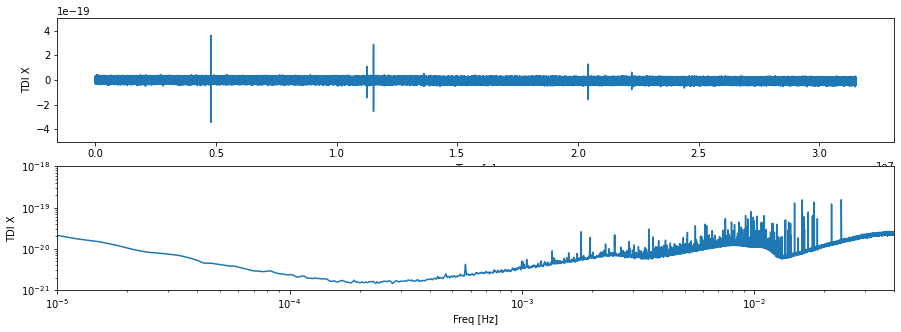

In [7]:
tdi = fid["obs/tdi"][()]
dt = tdi['t'][1]-tdi['t'][0]
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(tdi['t'], tdi["X"])
plt.axis([None, None, -0.5e-18, 0.5e-18])
plt.ylabel("TDI X")
plt.xlabel("Time [s]")
plt.subplot(212)
f, psdX =  scipy.signal.welch(tdi["X"].squeeze(), fs=1.0/dt, window='hanning', nperseg=256*256)
plt.loglog(f, np.sqrt(psdX))
plt.axis([1e-5, 4e-2, 1e-21, 1e-18])
plt.ylabel("TDI X")
plt.xlabel("Freq [Hz]")

### Get pipeline configuration

In [8]:
cfg = dict(zip(fid["obs/config"].keys(), [v[()] for v in fid["obs/config"].values()]))
cfg

{'accnoise': 2.4e-15,
 'backlinknoise': 3e-12,
 'dirname': b'v2',
 'dt': 2.5,
 'dt_instrument': 0.25,
 'dt_orbits': 86400.0,
 'dt_tdi': 5.0,
 'initial_position': 0.0,
 'initial_rotation': 0.0,
 'interp_order': 9,
 'nbatch': 1,
 'nominal_arm_length': 2500000000.0,
 'orbit_type': b'equal_armlength',
 'physic_upsampling': 1,
 'readoutnoise': 6.35e-12,
 'sim_kaiser_attenuation': 240,
 'sim_kaiser_delay': 4.5,
 'sim_kaiser_passband': 1.1,
 'sim_kaiser_stopband': 2.9,
 't_max': 31536000.0,
 't_min': 0.0,
 'tdi_kaiser_attenuation': 240,
 'tdi_kaiser_cutoff': 0.05,
 'tdi_kaiser_delay': 161.75,
 'tdi_kaiser_passband': 0.05,
 'tdi_kaiser_stopband': 0.1,
 'travel_time_order': 1}

In [9]:
cfg = dict(zip(fid["instru/config"].keys(), [v[()] for v in fid["instru/config"].values()]))
cfg

{'LISA_AAFILTER_ATTENUATION': 240,
 'LISA_AAFILTER_TRANSITION_BAND_0': 1.1,
 'LISA_AAFILTER_TRANSITION_BAND_1': 2.9,
 'LISA_ACC_NOISE_A_LEVEL': 2.4e-15,
 'LISA_ACC_NOISE_F_KNEE': 0.0004,
 'LISA_ACC_NOISE_USE_PZM': False,
 'LISA_ADC_RECURSION_ORDER': 1,
 'LISA_BACKLINK_NOISE_A_LEVEL': 3e-12,
 'LISA_BACKLINK_NOISE_F_KNEE': 0.002,
 'LISA_DEBUG_CLOCK_OFFSETS': False,
 'LISA_FREQUENCY_OFFSETS_12': 8.1,
 'LISA_FREQUENCY_OFFSETS_13': 1.4,
 'LISA_FREQUENCY_OFFSETS_21': -9.5,
 'LISA_FREQUENCY_OFFSETS_23': 9.2,
 'LISA_FREQUENCY_OFFSETS_31': 10.3,
 'LISA_FREQUENCY_OFFSETS_32': -11.6,
 'LISA_GLITCH_FILE': b'None',
 'LISA_GW_FILE_FS': 0.4,
 'LISA_GW_FILE_UPSAMPLING': 10.0,
 'LISA_GW_TYPE': b'file',
 'LISA_LASER_CENTRAL_FREQUENCY': 281600000.0,
 'LISA_LOCKING_SCHEME': b'N1c',
 'LISA_MEASUREMENT_DOWNSAMPLING': 1,
 'LISA_MEASUREMENT_FS': 4.0,
 'LISA_ORBIT_TYPE_0': b'file',
 'LISA_ORBIT_TYPE_1': b'ppr',
 'LISA_PHYSICS_FS': 4.0,
 'LISA_PRIMARY_LASER': b'12',
 'LISA_PUBLISH_BEATNOTE_COMPONENTS': True,
 '

### Get noiseless TDI data


In [10]:
tdi = fid["sky/mbhb/tdi"][()]

Text(0.5, 0, 'Time [s]')

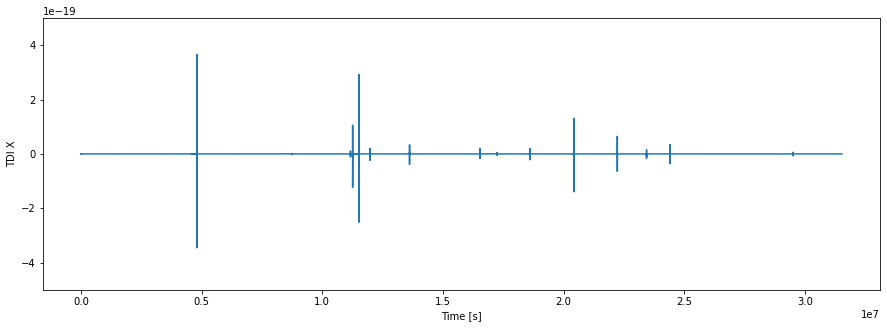

In [11]:
plt.figure(figsize=(15,5))
plt.plot(tdi['t'], tdi["X"])
plt.axis([None, None, -0.5e-18, 0.5e-18])
plt.ylabel("TDI X")
plt.xlabel("Time [s]")

# Some tips to deal with indexed data
In the LDC toolbox, we use the xarray python package to handle time and frequency series.  

In [12]:
import xarray as xr
X = xr.DataArray(tdi['X'].squeeze(), coords=[("t", tdi['t'].flatten())])
Y = xr.DataArray(tdi['Y'].squeeze(), coords=[("t", tdi['t'].flatten())])
Z = xr.DataArray(tdi['Z'].squeeze(), coords=[("t", tdi['t'].flatten())])
print(X)

<xarray.DataArray (t: 6307200)>
array([ 3.62700534e-22,  6.14763344e-22,  1.08330305e-21, ...,
       -5.82080396e-26, -5.81629209e-26, -5.81184036e-26])
Coordinates:
  * t        (t) float64 0.0 5.0 10.0 15.0 ... 3.154e+07 3.154e+07 3.154e+07


## Plotting facilities

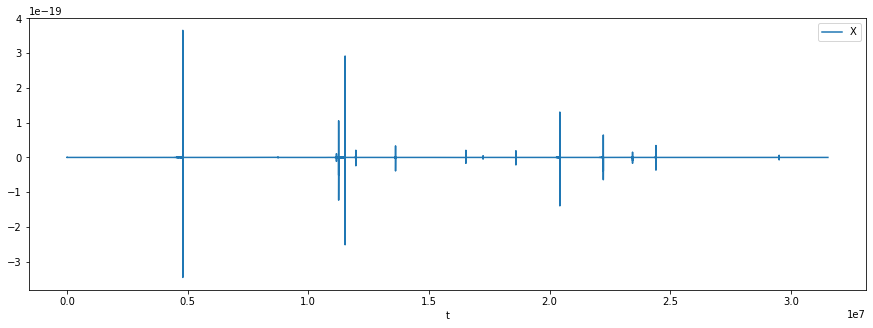

In [13]:
plt.figure(figsize=(15,5))
X.plot(label='X')
plt.legend()

## Data selection and indexing

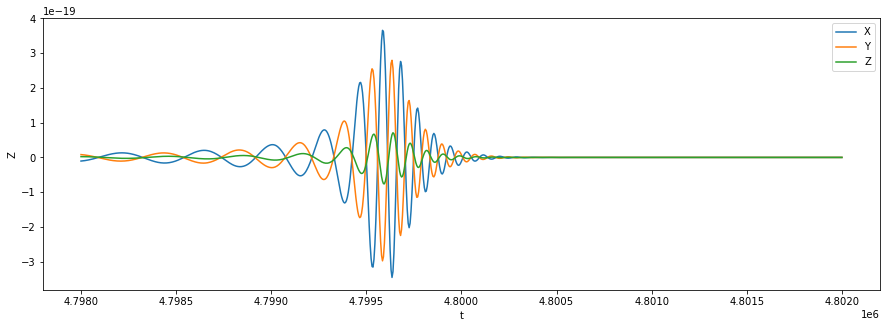

In [14]:
# data selection along time coordinate
ds = xr.Dataset({'X':X, 'Y':Y, 'Z':Z})
first_merger = ds.sel(t=slice(4798000, 4802000))
plt.figure(figsize=(15,5))
first_merger['X'].plot(label="X")
first_merger['Y'].plot(label="Y")
first_merger['Z'].plot(label="Z")
plt.legend()

# Fourier transform


One needs to remove samples at the edges

In [15]:
def window(tm, xl=1000.0, kap=0.005):
    """Return time domain window function to remove the first and last xl
    sec. 
    """
    ind_r = np.argwhere(tm[-1]-tm <= xl)[0][0]
    xr = tm[ind_r]
    winl = 0.5*(1.0 + np.tanh(kap*(tm-xl)))
    winr = 0.5*(1.0 - np.tanh(kap*(tm-xr)))
    return (winl*winr)

### GB in time domain

In [16]:
fid = h5py.File(training_file)
tdi = fid["sky/dgb/tdi"][()]

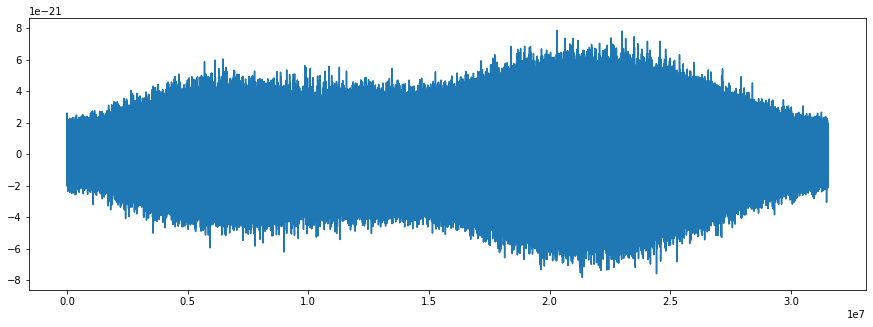

In [17]:
plt.figure(figsize=(15,5))
plt.plot(tdi['t'], tdi["X"])

### GB in freq. domain

In [18]:
dt = tdi["t"][1]-tdi["t"][0]
win = window(tdi["t"].flatten())
tdi_f = [np.fft.rfft(win*tdi[k].flatten())*dt for k in ["X", "Y", "Z"]]
df = 1.0/(dt * len(tdi['X']))
freq = df * np.arange(0, len(tdi_f[0]))
tdi_f = [xr.DataArray(tdi_f[j], dims=('f'), coords={'f':freq}) for j,k in enumerate(["X", "Y", "Z"])]
tdi_f = xr.Dataset(dict(zip(["X", "Y", "Z"], tdi_f)))

In [19]:
print(tdi_f["X"])

<xarray.DataArray 'X' (f: 3153601)>
array([ 1.15620842e-20+0.00000000e+00j,  1.15620842e-20+5.26545026e-24j,
        1.15620842e-20+1.05309025e-23j, ...,
       -6.75334795e-25-6.76407488e-30j, -6.75334778e-25-3.36657228e-30j,
       -6.75334820e-25+0.00000000e+00j])
Coordinates:
  * f        (f) float64 0.0 3.171e-08 6.342e-08 9.513e-08 ... 0.1 0.1 0.1 0.1


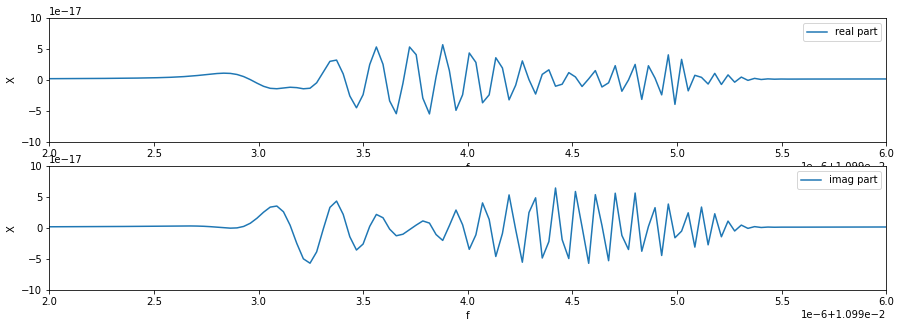

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(211)
tdi_f["X"].real.plot(label='real part')
plt.legend()
plt.axis([0.010992, 0.010996, -1e-16, 1e-16])
plt.subplot(212)
tdi_f["X"].imag.plot(label="imag part")
plt.axis([0.010992, 0.010996, -1e-16, 1e-16])
plt.legend()